## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Hypothesis setting
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Conclusions

#### 1. Importing libraries and data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#importing data
df_rankings = pd.read_csv(r'/Users/nayeraibrahim/Documents/CF assignments/Own Project/rankings_columnsdropped.csv', index_col = False)

#### 2. Hypothesis setting
High ranking universities rank high on their publications

#### 3. Data prep for regression analysis

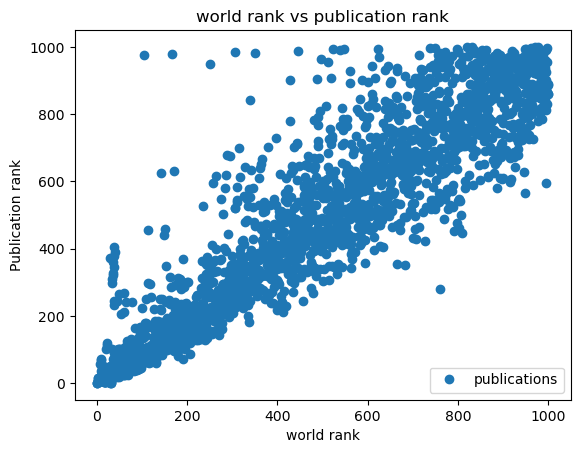

In [3]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_rankings.plot(x = 'world_rank', y='publications',style='o')
plt.title('world rank vs publication rank')  
plt.xlabel('world rank')  
plt.ylabel('Publication rank')  
plt.show()

In [4]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_rankings['world_rank'].values.reshape(-1,1)
y = df_rankings['publications'].values.reshape(-1,1)

In [5]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [6]:
# Create a regression object.

regression = LinearRegression()  

In [7]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

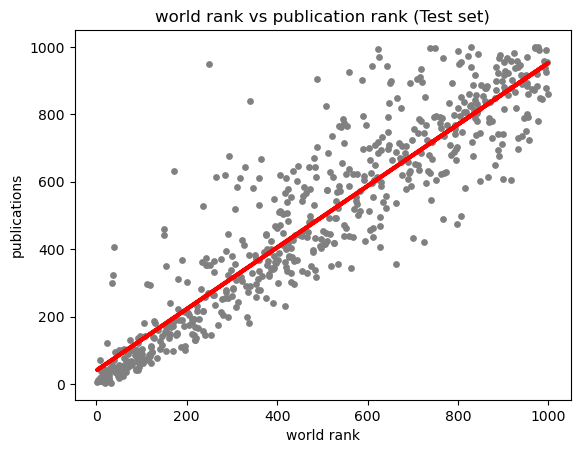

In [9]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('world rank vs publication rank (Test set)')
plot_test.xlabel('world rank')
plot_test.ylabel('publications')
plot_test.show()

The line fits the data points better in the 0-200 ranks than in the greater than 200 rank.

In [10]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [11]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91226455]]
Mean squared error:  13679.273903166422
R2 score:  0.8437752563850532


In [12]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,845,939.517422
1,781,808.151327
2,470,612.926715
3,51,104.795362
4,718,609.277656
5,165,244.371838
6,860,912.149486
7,851,775.309804
8,481,469.701181
9,422,702.328640


#### 5. Conclusions

The actual and predicted values are clearly off.
The slope indicates a positive, directly proportinal relationship between the two variables.
The mean squared error is quite large which indicates that the model is not accurate
The r2 value is 0.8 which indicates a good line fit.